This notebook aims to try and find how dimension reduction in different methods (PCA, Diffusion Map) affects the ability to separate the data (SVM)

In [31]:
# Imports
import scipy.io as spio
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn

In [13]:
# Loading the Data
data = spio.loadmat("..\\..\\..\\data\\inputs\\diffusion_dimension_analysis.mat")

CC_features = data["CC_features_squeezed"]
sf_labels = data["sflabels"]
diff_map = data["diffusion_map"]
train_stage = data["train_stage"]
pca_features = data["pca_cc_features"]

data = spio.loadmat("..\\..\\..\\data\\inputs\\sf_diffusion_map_analysis.mat")
sorted_diff_dim = data["feature_order"]
diff_map_smoothed = data["diffusion_map_smoothed"]


In [59]:
# Performing SVM
def svm_train_stages(X, y, train_stage):
    accuracy = []
    # Loop through unique stages
    for stage in np.unique(train_stage):
        # Use boolean indexing to filter X and y for the current stage
        current_stage_indices = (train_stage == stage).flatten()
        X_stage = X[current_stage_indices, :]
        y_stage = y[current_stage_indices]
        
        # Splitting the dataset for the current stage
        X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split( 
            X_stage, y_stage, test_size=0.2, random_state=42)
        
        # Initialize and fit the SVM model
        svm = sklearn.svm.SVC(kernel='linear')
        svm.fit(X_train, y_train)
        
        # Predict and calculate accuracy
        y_pred = svm.predict(X_test)
        stage_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
        
        accuracy.append(stage_accuracy)
    return accuracy

X = diff_map_smoothed[:, sorted_diff_dim.flatten()]
y = sf_labels
accuracy_diff_map = svm_train_stages(X, y, train_stage)

X = pca_features[:, :3]
accuracy_pca = svm_train_stages(X, y, train_stage)

X = CC_features
accuracy_CC = svm_train_stages(X, y, train_stage)


c:\Users\ariel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ariel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ariel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\ariel\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:1184: DataC

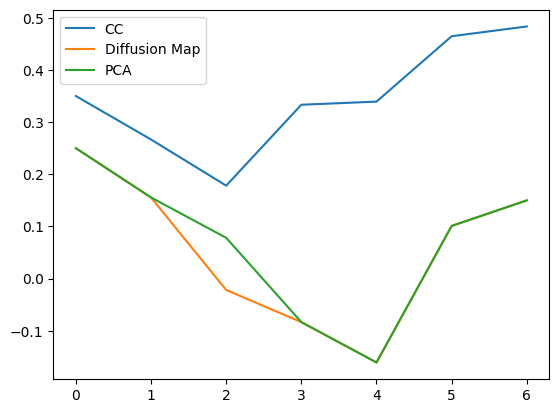

In [60]:
# PLotting SVM Results
avg_success_rate = []
for stage in np.unique(train_stage):
    avg_success_rate.append(np.mean(sf_labels[train_stage == stage]))
avg_success_rate = np.array(avg_success_rate)

plt.figure()
plt.plot(accuracy_CC - avg_success_rate, label='CC')
plt.plot(accuracy_diff_map - avg_success_rate, label='Diffusion Map')
plt.plot(accuracy_pca - avg_success_rate, label='PCA')
plt.legend()
plt.show()
